In [5]:
import hydrofunctions as hf
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import gdal
from gdalconst import GA_ReadOnly

plt.ion()
# set standard plot parameters for uniform plotting
plt.rcParams['figure.figsize'] = (11, 6)
# prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
# set working dir and import earthpy
import earthpy as et
#os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

%matplotlib inline

### First exploration to find the stations

In [6]:
# create map of stations
hf.draw_map()

In [7]:
dem = gdal.Open('DEM_LONLAT.tif', GA_ReadOnly)
geoTransform = dem.GetGeoTransform()
minx = geoTransform[0]
maxy = geoTransform[3]
maxx = minx + geoTransform[1] * dem.RasterXSize
miny = maxy + geoTransform[5] * dem.RasterYSize
dem = None
minx = round(minx, 2)
maxy = round(maxy, 2)
maxx = round(maxx, 2)
miny = round(miny, 2)
print([minx, miny, maxx, maxy])

[-96.0, 29.82, -95.26, 30.24]


In [8]:
# Request data for all stations in Bounding Box
#StreamFlow = hf.NWIS(bBox = [minx, miny, maxx, maxy]).get_data()
tes = hf.NWIS(bBox=[minx, miny, maxx, maxy]).get_data()
tes.response.ok
# List the names for the sites in the Bounding Box
tes.siteName

['W Fk San Jacinto Rv abv Lk Houston nr Porter, TX',
 'Spring Ck nr Tomball, TX',
 'Willow Ck nr Tomball, TX',
 'Bear Br at Research Blvd, The Woodlands, TX',
 'Panther Br at Gosling Rd, The Woodlands, TX',
 'Panther Br nr Spring, TX',
 'Spring Ck nr Spring, TX',
 'Cypress Ck at Katy-Hockley Rd nr Hockley, TX',
 'Cypress Ck at House-Hahl Rd nr Cypress, TX',
 'Little Cypress Ck nr Cypress, TX',
 'Cypress Ck at Grant Rd nr Cypress, TX',
 'Cypress Ck at Stuebner-Airline Rd nr Westfield, TX',
 'Cypress Ck nr Westfield, TX',
 'Bear Ck nr Barker, TX',
 'Langham Ck at W Little York Rd nr Addicks, TX',
 'Whiteoak Bayou at Alabonson Rd, Houston, TX',
 'Cole Ck at Deihl Rd, Houston, TX',
 'Brickhouse Gully at Costa Rica St, Houston, TX',
 'Greens Bayou at Cutten Rd nr Houston, TX',
 'Greens Bayou nr US Hwy 75 nr Houston, TX',
 'Greens Bayou nr Houston, TX',
 'Halls Bayou at Houston, TX']

In [9]:
tes.name

['USGS:08068090:00060:00001',
 'USGS:08068090:00060:00002',
 'USGS:08068090:00060:00003',
 'USGS:08068275:00060:00001',
 'USGS:08068275:00060:00002',
 'USGS:08068275:00060:00003',
 'USGS:08068325:00060:00001',
 'USGS:08068325:00060:00002',
 'USGS:08068325:00060:00003',
 'USGS:08068390:00060:00001',
 'USGS:08068390:00060:00002',
 'USGS:08068390:00060:00003',
 'USGS:08068400:00060:00001',
 'USGS:08068400:00060:00002',
 'USGS:08068400:00060:00003',
 'USGS:08068450:00060:00001',
 'USGS:08068450:00060:00002',
 'USGS:08068450:00060:00003',
 'USGS:08068500:00060:00001',
 'USGS:08068500:00060:00002',
 'USGS:08068500:00060:00003',
 'USGS:08068720:00060:00001',
 'USGS:08068720:00060:00002',
 'USGS:08068720:00060:00003',
 'USGS:08068740:00060:00001',
 'USGS:08068740:00060:00002',
 'USGS:08068740:00060:00003',
 'USGS:08068780:00060:00001',
 'USGS:08068780:00060:00002',
 'USGS:08068780:00060:00003',
 'USGS:08068800:00060:00001',
 'USGS:08068800:00060:00002',
 'USGS:08068800:00060:00003',
 'USGS:080

### Plot spatially selected points stations

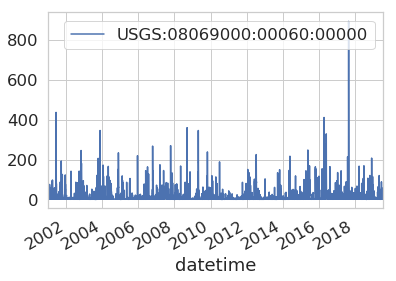

In [100]:
# define the site number and start and end dates that you are interested in
site = '08069000'
start = '2001-01-01'
end = '2019-07-25'

# then request data for that site and time period 
#longmont_resp = hf.get_nwis(site, 'dv', start, end)
#StuebnerTx = hf.NWIS(site, 'iv', start, end)
Requests  = hf.NWIS(site, service='iv', start_date = start, end_date=end).get_data()
RequestsProperty = hf.NWIS(site).get_data().json()
# StreamFlow.response.ok
StreamFlow = Requests.df()

Loc = hf.get_nwis_property(RequestsProperty, key='geoLocation', remove_duplicates=True) 
Name = hf.get_nwis_property(RequestsProperty, key='siteName', remove_duplicates=True) 
code_raw = hf.get_nwis_property(RequestsProperty, key='siteCode', remove_duplicates=True)

X = []
Y = []
Code = []

counter = 0
for i,val in Loc:    
    X.append(Loc[counter]['geogLocation']['longitude'])
    Y.append(Loc[counter]['geogLocation']['latitude'])
    Code.append(code_raw[counter][0]['value'])
    counter = counter + 1


d = {'X':X, 'Y':Y, 'Name':Name, 'Code':Code}
#merge in pandas dataframe
df = pd.DataFrame(d) #, columns=['X', 'Y', 'Name']))
StreamFlow = StreamFlow[StreamFlow.columns.drop(list(StreamFlow.filter(regex='_qualifiers')))] 
#convert to m3/s
StreamFlow = StreamFlow*0.0283168
StreamFlow.to_csv(site + '.csv')
StreamFlow.plot()

In [92]:
StreamFlow

,USGS:08069000:00060:00000,USGS:08069000:00060:00000_qualifiers
datetime,,
2015-01-01 00:00:00-06:00,108.0,A
2015-01-01 00:15:00-06:00,112.0,A
2015-01-01 00:30:00-06:00,112.0,A
2015-01-01 00:45:00-06:00,114.0,A
2015-01-01 01:00:00-06:00,105.0,A
2015-01-01 01:15:00-06:00,110.0,A
2015-01-01 01:30:00-06:00,112.0,A
2015-01-01 01:45:00-06:00,106.0,A
2015-01-01 02:00:00-06:00,108.0,A


In [1]:
StreamFlow.reset_index(inplace=True)

NameError: name 'StreamFlow' is not defined

In [69]:
StreamFlow['datetime'].replace('\([0-9]+\)\s*','', regex=True, inplace=True)